In [3]:
!python DownloadData.py

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Processed dataset saved to: data/lipophilicity_processed.csv

Preview:
                                              smiles      logD
0                  CC(C)NCC(O)COc1ccc(COCCOC(C)C)cc1 -1.703482
1                                Cc1ccc(NC(=N)N)cc1C -2.892589
2                   CC(C)C(=O)NCCNCC(O)COc1ccc(O)cc1 -1.909924
3  C[C@@](O)(C(=O)Nc1ccc(cc1Cl)S(=O)(=O)NCC=C)C(F...  0.749051
4                         CC(C)NCC(O)COc1ccccc1OCC=C -1.620905


raw data preview

In [1]:
import pandas as pd
df = pd.read_csv("data/lipophilicity_processed.csv")
df.head()


,smiles,logD
0,CC(C)NCC(O)COc1ccc(COCCOC(C)C)cc1,-1.703482
1,Cc1ccc(NC(=N)N)cc1C,-2.892589
2,CC(C)C(=O)NCCNCC(O)COc1ccc(O)cc1,-1.909924
3,C[C@@](O)(C(=O)Nc1ccc(cc1Cl)S(=O)(=O)NCC=C)C(F...,0.749051
4,CC(C)NCC(O)COc1ccccc1OCC=C,-1.620905


行 3 的分子:


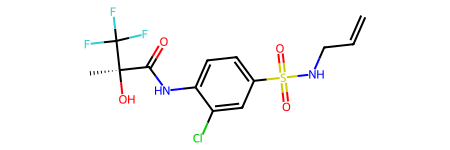


行 3 的数据摘要:
smiles    C[C@@](O)(C(=O)Nc1ccc(cc1Cl)S(=O)(=O)NCC=C)C(F...
logD                                               0.749051
Name: 3, dtype: object


In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


# 读取数据
df = pd.read_csv("data/lipophilicity_processed.csv")

# 指定要查看的行号
target_row = 3  # 修改这个数字查看不同行

# 自动查找SMILES列
smiles_col = next((col for col in df.columns if 'smiles' in col.lower()), None)

if smiles_col:
    if target_row < len(df):
        smiles = df.iloc[target_row][smiles_col]
        mol = Chem.MolFromSmiles(smiles)
        
        if mol:
            # 在Jupyter中显示分子
            print(f"行 {target_row} 的分子:")
            display(mol)
            
            # 显示该行数据摘要
            print(f"\n行 {target_row} 的数据摘要:")
            print(df.iloc[target_row])
        else:
            print(f"无法解析SMILES: {smiles}")
    else:
        print(f"行号 {target_row} 超出范围 (0-{len(df)-1})")
else:
    print("未找到SMILES列")
    print("可用的列:", df.columns.tolist()) 

数据处理